# Examen Parcial 2 - Estadistica Aplicada
Nombre: Salvador Almaguer Orta

Matrícula: 2076430

Grupo: 44

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from lifelines import KaplanMeierFitter,ExponentialFitter, LogNormalFitter, WeibullFitter, CoxPHFitter

### El  Banco  de  la  Ilusión  (BIL)  ha  reconocido  la  necesidad  de  revisar  sus  políticas  de otorgamiento de préstamos.

### En  este  contexto,  sete  ha designado para  llevar  a  cabo  un  análisis  integral  de  la situación. 

### Se utilizará una base de datos proporcionada por el banco, que contiene información sobre los créditos y préstamos otorgados a distintos clientes. https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv

### La base de datos proporcionada contiene información relevante sobre cada préstamo.
### La variable "**crédito_pagado**" toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar.
### Además, se dispone de información sobre el tiempo en meses que lleva pagar completamente el préstamo, registrado  en  la  variable  "**meses**", 
### y  el  monto  del  préstamo  otorgado  en  euros, registrado en la variable "**cantidad**".

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

## 1. Análisis explorativo

### a)Cuantas variables y cuantas observaciones tienenla base

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

***La base tiene 21 variables y 1,000 observaciones***

### b)Cuál es el monto promedio de los créditos otorgados por el banco

In [40]:
creditos_promedio = data['cantidad'].mean()
print(f'El monto promedio de los creditos otorgados por el banco es: {creditos_promedio} Euros')

El monto promedio de los creditos otorgados por el banco es: 3271.258 Euros


### c)Cuáles  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad

In [41]:
mes_promedio = data['meses'].mean()
print(f'El tiempo pormedio que se tardaron en pagar el prestamo es de: {mes_promedio} meses')

El tiempo pormedio que se tardaron en pagar el prestamo es de: 20.903 meses


### d)Cuáles la tasa de interés promedio otorgada por el banco

In [42]:
tasa_interes_promedio = data['tasa_de_interes'].mean()
print(f'La tasa de interés promedio otorgada por el banco es de: {tasa_interes_promedio}%')

La tasa de interés promedio otorgada por el banco es de: 2.973%


### e)Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [43]:
tasa_interes_promedio_pagado = data[ data['credito_pagado'] == 1 ] ['tasa_de_interes' ].mean()
monto_promedio_pagado = round(data[ data['credito_pagado'] == 1 ] ['cantidad' ].mean(),2)

print(f'El monto promedio de los que pagaron es: {monto_promedio_pagado} Euros \nLa tasa de interes promedio de los que pagaron es: {tasa_interes_promedio_pagado}%')

El monto promedio de los que pagaron es: 2985.46 Euros 
La tasa de interes promedio de los que pagaron es: 2.92%


### f)Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

In [44]:
tasa_interes_promedio_no_pagado = round(data[ data['credito_pagado'] == 0 ] ['tasa_de_interes' ].mean(),3)
monto_promedio_no_pagado = round(data[ data['credito_pagado'] == 0 ] ['cantidad' ].mean(),2)

print(f'El monto promedio de los que no pagaron es: {monto_promedio_no_pagado} Euros \nLa tasa de interes promedio de los que no pagaron es: {tasa_interes_promedio_no_pagado}%')

El monto promedio de los que no pagaron es: 3938.13 Euros 
La tasa de interes promedio de los que no pagaron es: 3.097%


## 2.Estime un modelo de Kaplan-meier 

In [45]:
modelo_km = KaplanMeierFitter().fit(data['meses'], data['credito_pagado'])

### a)cuál es la mediana del tiempo y que significa

In [46]:
mediana = modelo_km.median_survival_time_
mediana

24.0

#### ***La mediana del tiempo que tardan en pagar es de 24 meses, esto significa que la mitad de la gente pago antes de los 24 meses***

### b)es mayor/menor que el tiempo promedio del inciso 1c

#### ***Es Mayor***

## 3.Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

In [47]:
mexpo = ExponentialFitter().fit(data['meses'],data['credito_pagado'])
mweibull = WeibullFitter().fit(data['meses'],data['credito_pagado'])
mlog = LogNormalFitter().fit(data['meses'],data['credito_pagado'])

mexpo.AIC_, mweibull.AIC_, mlog.AIC_

(6157.194686589735, 5900.981425445045, 5813.747334550531)

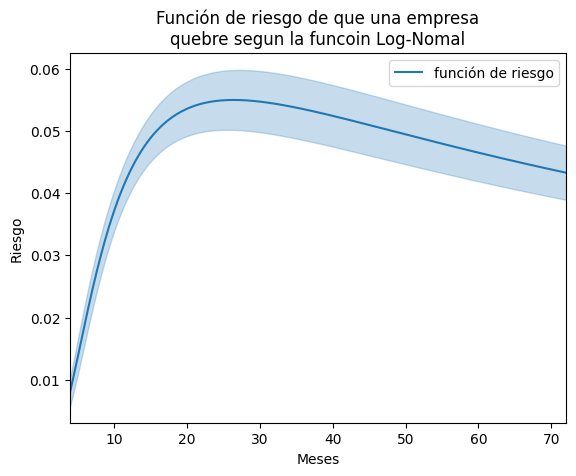

In [48]:
mlog.plot_hazard(label='función de riesgo')
plt.title('Función de riesgo de que una empresa\nquebre segun la funcoin Log-Nomal')
plt.xlim(4,72)
plt.xlabel('Meses')
plt.ylabel('Riesgo')
plt.show()

### ***El riesgo que presenta nuestro modelo es tipo log-normal respecto al tiempo.***

## 4.Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

### a)A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

#### Para este modelo se escojeran las sigueinte variables:
***edad***

***casa***

***extranjero***

***numero_creditos***

### b)Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué


***edad***: Esperaria que mientras mayor edad tenga los prestatarios tengan una economia mas estable y puedan pagar antes o aumente el riesgo de pagar su deuda.

***casa***: Se espera que al tener casa propia, entonces, de esta manera signifique que tenga una economia mas estable y pueda pagar antes o aumente el riesgo de pagar su deuda en comparacion con los que no tienen casa propia.

***extranjero***: Al ser un prestatario de otra nacion, su compromiso con saldar la deuda con bancos de otra nacionalidad no es tan grande y por l tanto se esperaria que esta variable disminuya el reisgo de pagar la deuda.

***numero_creditos***: Al contar con mayor cantidad de creditos, considerando que mientras mas creditos tenga es porque si suele pagar pensando en que si el banco les presto antes y pago, entonces, es un prestatario que si suele pagar sus prestamos. Asi que se esperaria que esta variable aumente el riesgo de pagar el credito.

### c)Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [49]:
# Se escojeran las variables: edad, casa, extranjero y numero_creditos
data_new = data[['credito_pagado', 'meses', 'tasa_de_interes', 'cantidad', 'edad', 'casa', 'extranjero', 'numero_creditos']]
data_new['casa'] = np.where(data_new['casa'] == 'propia', 1, 0) # la variable casa se tomara como 1-> si tine casa propia, 0-> si no tiene casa propia

data_new.isnull().sum() # No hay nulos

C:\Users\A\AppData\Local\Temp\ipykernel_7108\3717905942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['casa'] = np.where(data_new['casa'] == 'propia', 1, 0) # la variable casa se tomara como 1-> si tine casa propia, 0-> si no tiene casa propia


credito_pagado     0
meses              0
tasa_de_interes    0
cantidad           0
edad               0
casa               0
extranjero         0
numero_creditos    0
dtype: int64

### d)Estima  un  modelo  de  cox  con  las  variables  elegidas  e  interpreta  los coeficientes.

In [50]:
cph = CoxPHFitter().fit(data_new, 'meses', 'credito_pagado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4039.72
         time fit was run = 2023-10-07 20:15:23 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
tasa_de_interes  -0.41       0.67       0.04            -0.48            -0.33                 0.62                 0.72
cantidad         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
edad              0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
casa              0.21       1.23       0.09             0.04             0.38                 1.04                 1.46
extranjero       -1.20       0.30       0.18            -1.56            -0.84                 0.21                 0.43
numero_creditos   0.12       1.12       0.07            -0.01             0.25                 0.99                 1.28

                  cmp to      z      p   -log2(p)
covariate                                        
tasa_de_interes     0.00 -11.08 <0.005      92.44
cantidad            0.00 -16.13 <0.005     192.12
edad                0.00   4.54 <0.005      17.47
casa                0.00   2.36   0.02       5.77
extranjero          0.00  -6.50 <0.005      33.53
numero_creditos     0.00   1.74   0.08       3.61
---
Concordance = 0.78
Partial AIC = 8091.43
log-likelihood ratio test = 459.34 on 6 df
-log2(p) of ll-ratio test = 316.64

***tasa_de_interes:*** Debido a que el p_valor < 0.05; Entonces esta variable si afecta al riesgo de pagar el credito, y por cada punto de porcentaje (1%) de interes el riesgo diminuye en 33% (suponiendo que en la tabla 2 significa 2%).

***cantidad:*** Debido a que el p_valor < 0.05; Entonces esta variable si afecta al riesgo de pagar el credito, y por cada Euro el riesgo de pagar el credito dismimuye en 0.00037%.

***edad:*** Debido a que el p_valor < 0.05; Entonces esta variable si afecta al riesgo de pagar el credito, y por cada año de edad el riesgo de pagar el credito aumenta en 2%.

***casa:*** Debido a que el p_valor < 0.05; Entonces esta variable si afecta al riesgo de pagar el credito, y por tener casa propia aumenta el riesgo de pagar el credito en 23% en comparacion con no tener casa propia.

***extranjero:*** Debido a que el p_valor < 0.05; Entonces esta variable si afecta al riesgo de pagar el credito, y por ser extranjero disminuye el riesgo de pagar el credito en 70% en comparacion con no ser extranjero.

***numero_creditos:*** Debido a que el p_valor > 0.05; Entonces esta variable NO afecta al riesgo de pagar el credito.

## 5.Con  base  en  los  cálculos  realizados,  redacta  un  comentario integral de  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.

#### *En este análisis, nuestro objetivo era estudiar el comportamiento de los clientes que solicitan préstamos y los factores que influyen en el riesgo de impago. Para ello, utilizamos una muestra de datos de 1000 clientes que solicitaron préstamos entre enero y diciembre de 2023. Los datos incluían variables como la cantidad solicitada, la tasa de interés, el plazo, la edad, el estado civil, el nivel educativo, el tipo de vivienda y la nacionalidad.*


#### *Con las actuales políticas, el monto promedio de préstamo por cliente es de 3271.25 Euros y en promedio se tardan en pagar el crédito 21 meses, pero la mitad de los prestatarios pagan antes de los 24 meses. La tasa de interés promedio es de 2.973% y el riesgo de impago tiene una forma tipo log-normal. Esto significa que la mayoría de los clientes tienen un riesgo bajo o moderado, pero hay algunos casos extremos con un riesgo muy alto.*


#### *También descubrimos que aparte de las variables de ‘tasa de interés’ y ‘cantidad’, otras buenas variables que influyen en el riesgo de impago en nuestro modelo son las variables ‘edad’, ‘casa’ y ‘extranjero’. Observamos que a mayor edad, menor es el riesgo de impago, lo que puede deberse a una mayor estabilidad financiera y laboral. Asimismo, tener una casa propia reduce el riesgo de impago, ya que implica un menor gasto en alquiler y una mayor capacidad de ahorro. Por último, ser extranjero disminuye mucho la probabilidad de no pagar el crédito en comparación con no ser extranjero. Esto puede deberse a que los extranjeros tienen más dificultades para acceder al crédito y por tanto son más cuidadosos a la hora de devolverlo.*

#### *Por lo tanto, se recomienda regular las políticas de préstamo a extranjeros, ya que son un segmento con un alto riesgo de inpago y una alta demanda potencial. También se sugiere revisar los criterios de elegibilidad y las condiciones de los préstamos para adaptarlos mejor al perfil y las necesidades de cada cliente.*

*Notece que se menciono 'alto riesgo de inpago' siendo lo mismo que 'bajo riesgo de pago' y viseversa*
